In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets_torch_geometric.dataset_factory import create_dataset
from omegaconf import OmegaConf
import torch


In [6]:
dataset_names_paper = { "DVSGESTURE_TONIC": "DVS-Gesture",
                        "NASL":             "N-ASL",
                        "NCALTECH101":      "N-Caltech101",
                        "NCARS":            "N-Cars",
                        "FAN1VS3":          "Fan1vs3"}

In [7]:
folder_dir = os.path.join("images", "paper", "sparsity_vs_acc")

In [8]:
config_files_dict = {d:os.path.join("cfg_folder", f"EST_{d}_wandb_sweep.yaml") for d in dataset_names_paper.keys()}

In [9]:
try:
    num_events = np.load(os.path.join(folder_dir, "num_events.npy"), allow_pickle=True).item()
    print("File found. Loading it.")
except FileNotFoundError:
    print("File not found. Start creating it now. Go drink a coffee, this will take a while.")
    num_events = {}
    for dataset_name in dataset_names_paper.keys():
        dataset = create_dataset(
                        dataset_path = os.path.join("datasets_torch_geometric", dataset_name, "data"),
                        dataset_name  = dataset_name, 
                        dataset_type = 'all'
                    )
        num_events[dataset_name] = [d.num_nodes for d in dataset]
        print(f"{dataset_name} is finished. Number of samples: {len(dataset)}")
    np.save("num_events.npy", num_events)

File found. Loading it.


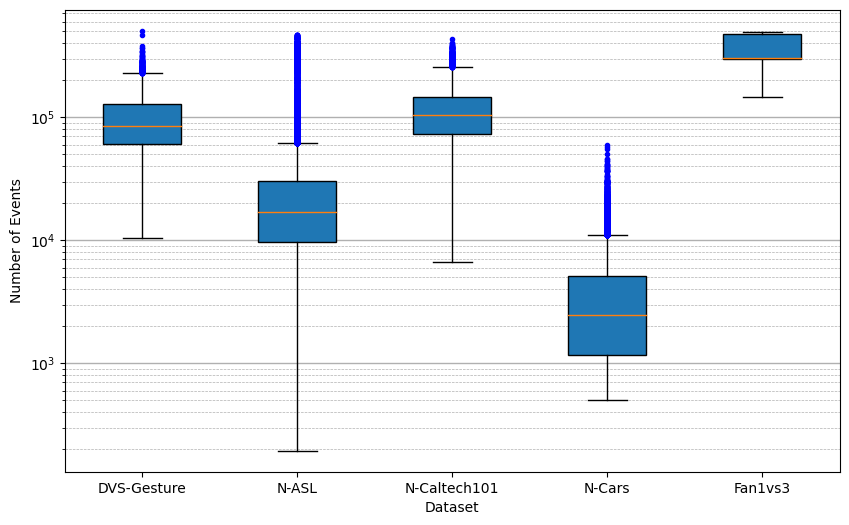

In [10]:
data_values = [num_events[key] for key in num_events]

# Plotting the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_values, patch_artist=True, sym="b.")
plt.yscale('log')

# Adding labels to x-axis
plt.xticks(range(1, len(num_events) + 1), [dataset_names_paper[k] for k in num_events.keys()])

# Adding title and labels
# plt.title('Boxplot of Number of Events for Each Dataset')
plt.xlabel('Dataset')
plt.grid(axis='y',which='minor', linestyle='--', linewidth=0.5)
plt.grid(axis='y',which='major', linestyle='-', linewidth=1)
plt.ylabel('Number of Events')

# Show plot

plt.savefig(os.path.join(folder_dir, "num_events_boxplot.png"), format="png")
plt.show()



In [47]:
np.nonzero((np.array(num_events['NASL']) > 5000) & (np.array(num_events['NASL']) > 15000))[0].shape

(57281,)

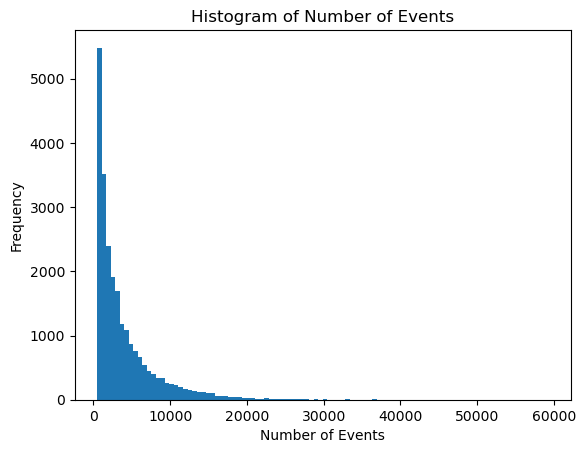

In [49]:
plt.hist(num_events['NCARS'], bins=100)
plt.xlabel('Number of Events')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Events')
plt.show()


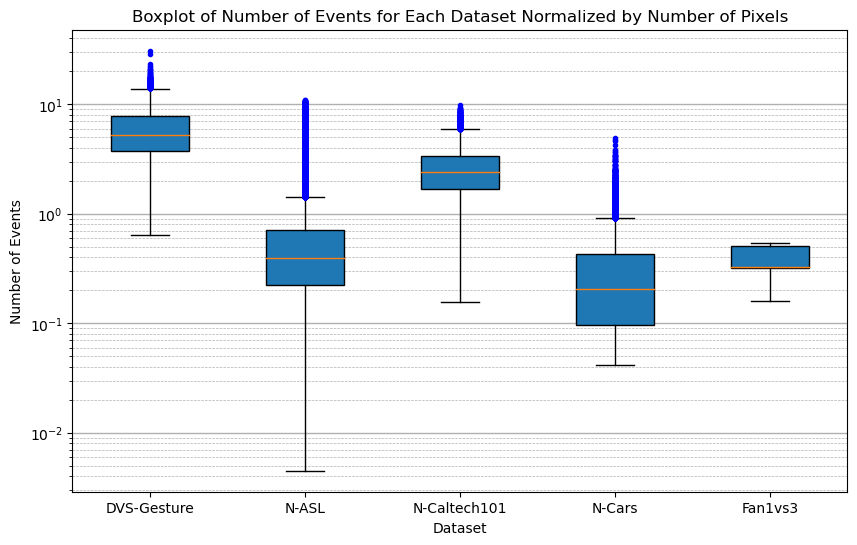

In [7]:
data_values =[]
for key in num_events:
    cfg = OmegaConf.load(config_files_dict[key])
    num_pixels = np.prod(cfg.dataset.image_resolution)
    data_values.append(num_events[key]/num_pixels)

# Plotting the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_values, patch_artist=True, sym="b.")
plt.yscale('log')

# Adding labels to x-axis
plt.xticks(range(1, len(num_events) + 1), [dataset_names_paper[k] for k in num_events.keys()])

# Adding title and labels
plt.title('Boxplot of Number of Events for Each Dataset Normalized by Number of Pixels')
plt.xlabel('Dataset')
plt.grid(axis='y',which='minor', linestyle='--', linewidth=0.5)
plt.grid(axis='y',which='major', linestyle='-', linewidth=1)
plt.ylabel('Number of Events')

# Show plot

plt.savefig(os.path.join(folder_dir, "num_events_normalized_boxplot.png"), format="png")
plt.show()

In [8]:
for dataset_name, paper_name in dataset_names_paper.items():
    print(f"num. videos in {paper_name}: {len(num_events[dataset_name])}")

num. videos in DVS-Gesture: 4470
num. videos in N-ASL: 100800
num. videos in N-Caltech101: 8709
num. videos in N-Cars: 24029
num. videos in Fan1vs3: 510


In [10]:
what_dataset = "FAN1VS3"
duration_of_videos = {}
class_numbers = {}
for dataset_name in dataset_names_paper.keys():
    if dataset_name == what_dataset:
        dataset = create_dataset(
                        dataset_path = os.path.join("datasets_torch_geometric", dataset_name, "data"),
                        dataset_name  = dataset_name, 
                        dataset_type = 'all'
                    )
        duration_of_videos[dataset_name] = np.array([[torch.min(d.pos[:,2]),torch.max(d.pos[:,2])] for d in dataset])
        class_numbers[dataset_name] = np.array([d.y for d in dataset])

In [11]:
np.max(duration_of_videos[what_dataset][:,1] - duration_of_videos[what_dataset][:,0])

73999.0

In [12]:
dataset[0].label

['speed_1']

In [13]:
(np.array(class_numbers[dataset_name])<0.5).sum()

235